# loading data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

In [2]:
skin_df=pd.read_csv('HAM10000_metadata.csv')

In [3]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('', '*', '*.jpg'))}

In [4]:
skin_df['path']=skin_df['image_id'].map(image_path.get)

load image in size of 128x128 as datafram colunms

In [5]:
skin_df['image']=skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((128,128))))

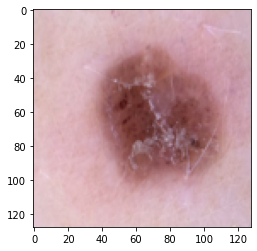

In [6]:
plt.imshow(skin_df['image'][22])

در این قسمت از کد برای جدا کردن دیتا های کلاس های مختلف و جایگذاری آنها در فولدر های مخصوص به کلاس خود است و در 
فایل مربوطه این فولدر ها تصاویر وجود دارند پس نیاز نیست که دوباره این بخش از کد اجرا شود

از اینجا شروع شده:

In [19]:
import shutil

In [20]:
data_dir=os.getcwd()+'/data/'

In [21]:
data_dir

'C:\\Users\\bartar/data/'

In [22]:
dest_dir=os.getcwd()+'/PData/recognized/'

In [23]:
dest_dir

'C:\\Users\\bartar/PData/recognized/'

In [24]:
label=skin_df['dx'].unique().tolist()

In [25]:
label_images=[]

In [26]:
for i in label:
    os.mkdir(dest_dir+str(i)+'/')
    sample=skin_df[skin_df['dx']==i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir+'/'+id+'.jpg'),(dest_dir+i+'/'+id+'.jpg'))
    label_images=[]

در اینجا تمام شده.

با توجه به اینکه دیتا ها نامتوازن اند پس در این بخش با آگمنت کردن دسته های کوچک سعی کرده داده ها را متوازن کرده

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# agmenting data

agmenting class one----------->akiec

In [8]:
datagen_akiec_0=ImageDataGenerator()

datagen_akiec_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,2),
        shear_range=5,
        fill_mode='reflect',
        horizontal_flip=True,
        vertical_flip=True
    )

datagen_akiec_2=ImageDataGenerator(
        rotation_range=45,
        width_shift_range=2,
         height_shift_range=2,
        brightness_range=(0.5,1),
        shear_range=5,
        fill_mode='nearest',
        vertical_flip=True
    )

In [9]:
dir_akiec=os.getcwd()+'/PData/gen/akiec_class/'
dir_akiec

'C:\\Users\\bartar/PData/gen/akiec_class/'

In [10]:
train_data_akiec=datagen_akiec_0.flow_from_directory(directory=dir_akiec,
                                            class_mode='categorical',
                                            batch_size=327,
                                            target_size=(128,128))

Found 327 images belonging to 1 classes.


در این  بخش متغییر هایی با اندیس صفر خود داده های اصلی اند و اندیس های دیگر داده های آگمنت شده اند 

In [11]:
x_akiec_0,y_akiec_0=next(train_data_akiec)

In [14]:
train_data_akiec=datagen_akiec_1.flow_from_directory(directory=dir_akiec,
                                            class_mode='categorical',
                                            batch_size=327,
                                            target_size=(128,128))

Found 327 images belonging to 1 classes.


In [15]:
x_akiec_1,y_akiec_1=next(train_data_akiec)

In [17]:
train_data_akiec=datagen_akiec_2.flow_from_directory(directory=dir_akiec,
                                            class_mode='categorical',
                                            batch_size=327,
                                            target_size=(128,128))

Found 327 images belonging to 1 classes.


In [18]:
x_akiec_2,y_akiec_2=next(train_data_akiec)

agmenting class two----------->bcc

In [20]:
datagen_bcc_0=ImageDataGenerator()

datagen_bcc_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,1.3),
        shear_range=5,
        fill_mode='reflect',
        horizontal_flip=True,
    )

In [21]:
dir_bcc=os.getcwd()+'/PData/gen/bcc_class/'
dir_bcc

'C:\\Users\\bartar/PData/gen/bcc_class/'

In [22]:
train_data_bcc=datagen_bcc_0.flow_from_directory(directory=dir_bcc,
                                            class_mode='categorical',
                                            batch_size=514,
                                            target_size=(128,128))

Found 514 images belonging to 1 classes.


In [23]:
x_bcc_0,y_bcc_0=next(train_data_bcc)

In [24]:
train_data_bcc=datagen_bcc_1.flow_from_directory(directory=dir_bcc,
                                            class_mode='categorical',
                                            batch_size=514,
                                            target_size=(128,128))

Found 514 images belonging to 1 classes.


In [25]:
x_bcc_1,y_bcc_1=next(train_data_bcc)

agmenting class three----------->bkl

In [26]:
datagen_bkl_0=ImageDataGenerator()

datagen_bkl_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,1.3),
        shear_range=5,
        fill_mode='reflect',
        vertical_flip=True
    )

In [27]:
dir_bkl=os.getcwd()+'/PData/gen/bkl_class/'
dir_bkl

'C:\\Users\\bartar/PData/gen/bkl_class/'

In [28]:
train_data_bkl=datagen_bkl_0.flow_from_directory(directory=dir_bkl,
                                            class_mode='categorical',
                                            batch_size=1099,
                                            target_size=(128,128))

Found 1099 images belonging to 1 classes.


In [29]:
x_bkl_0,y_bkl_0=next(train_data_bkl)

In [30]:
train_data_bkl=datagen_bkl_1.flow_from_directory(directory=dir_bkl,
                                            class_mode='categorical',
                                            batch_size=450,
                                            target_size=(128,128))

Found 1099 images belonging to 1 classes.


In [31]:
x_bkl_1,y_bkl_1=next(train_data_bkl)

agmenting class four----------->df

In [32]:
datagen_df_0=ImageDataGenerator()

datagen_df_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,1.3),
        shear_range=5,
        fill_mode='reflect',
        vertical_flip=True
    )


datagen_df_2=ImageDataGenerator(
        rotation_range=100,
        width_shift_range=3,
         height_shift_range=3,
        brightness_range=(0.5,2),
        shear_range=5,
        fill_mode='reflect',
        horizontal_flip=True,
    )

datagen_df_3=ImageDataGenerator(
        rotation_range=45,
        width_shift_range=2,
         height_shift_range=2,
        brightness_range=(0.5,1),
        shear_range=5,
        fill_mode='nearest',
        vertical_flip=True
    )

In [33]:
dir_df=os.getcwd()+'/PData/gen/df_class/'
dir_df

'C:\\Users\\bartar/PData/gen/df_class/'

In [34]:
train_data_df=datagen_df_0.flow_from_directory(directory=dir_df,
                                            class_mode='categorical',
                                            batch_size=115,
                                            target_size=(128,128))

Found 115 images belonging to 1 classes.


In [35]:
x_df_0,y_df_0=next(train_data_df)

In [36]:
train_data_df=datagen_df_1.flow_from_directory(directory=dir_df,
                                            class_mode='categorical',
                                            batch_size=115,
                                            target_size=(128,128))

Found 115 images belonging to 1 classes.


In [37]:
x_df_1,y_df_1=next(train_data_df)
x_df_2,y_df_2=next(train_data_df)
x_df_3,y_df_3=next(train_data_df)

In [38]:
train_data_df=datagen_df_2.flow_from_directory(directory=dir_df,
                                            class_mode='categorical',
                                            batch_size=115,
                                            target_size=(128,128))

Found 115 images belonging to 1 classes.


In [39]:
x_df_4,y_df_4=next(train_data_df)
x_df_5,y_df_5=next(train_data_df)
x_df_6,y_df_6=next(train_data_df)

In [40]:
train_data_df=datagen_df_3.flow_from_directory(directory=dir_df,
                                            class_mode='categorical',
                                            batch_size=115,
                                            target_size=(128,128))

Found 115 images belonging to 1 classes.


In [41]:
x_df_7,y_df_7=next(train_data_df)
x_df_8,y_df_8=next(train_data_df)
x_df_9,y_df_9=next(train_data_df)

agmenting class five----------->mel

In [42]:
datagen_mel_0=ImageDataGenerator()

datagen_mel_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,1.3),
        shear_range=5,
        fill_mode='nearest',
        vertical_flip=True
    )

In [43]:
dir_mel=os.getcwd()+'/PData/gen/mel_class/'
dir_mel

'C:\\Users\\bartar/PData/gen/mel_class/'

In [44]:
train_data_mel=datagen_mel_0.flow_from_directory(directory=dir_mel,
                                            class_mode='categorical',
                                            batch_size=1113,
                                            target_size=(128,128))

Found 1113 images belonging to 1 classes.


In [45]:
x_mel_0,y_mel_0=next(train_data_mel)

In [46]:
train_data_mel=datagen_mel_1.flow_from_directory(directory=dir_mel,
                                            class_mode='categorical',
                                            batch_size=500,
                                            target_size=(128,128))

Found 1113 images belonging to 1 classes.


In [47]:
x_mel_1,y_mel_1=next(train_data_mel)

agmenting class six----------->nv

In [49]:
datagen_nv_0=ImageDataGenerator()

In [50]:
dir_nv=os.getcwd()+'/PData/gen/nv_class/'
dir_nv

'C:\\Users\\bartar/PData/gen/nv_class/'

In [51]:
train_data_nv=datagen_nv_0.flow_from_directory(directory=dir_nv,
                                            class_mode='categorical',
                                            batch_size=6705,
                                            target_size=(128,128))

Found 6705 images belonging to 1 classes.


In [52]:
x_nv_0,y_nv_0=next(train_data_nv)

agmenting class seven----------->vasc

In [53]:
datagen_vasc_0=ImageDataGenerator()

datagen_vasc_1=ImageDataGenerator(
        rotation_range=180,
        width_shift_range=10,
         height_shift_range=10,
        brightness_range=(0.5,1.3),
        shear_range=5,
        fill_mode='reflect',
        vertical_flip=True
    )


datagen_vasc_2=ImageDataGenerator(
        rotation_range=100,
        width_shift_range=3,
         height_shift_range=3,
        brightness_range=(0.5,2),
        shear_range=5,
        fill_mode='reflect',
        horizontal_flip=True,
    )

datagen_vasc_3=ImageDataGenerator(
        rotation_range=45,
        width_shift_range=2,
         height_shift_range=2,
        brightness_range=(0.5,1),
        shear_range=5,
        fill_mode='nearest',
        vertical_flip=True
    )

In [54]:
dir_vasc=os.getcwd()+'/PData/gen/vasc_class/'
dir_vasc

'C:\\Users\\bartar/PData/gen/vasc_class/'

In [55]:
train_data_vasc=datagen_vasc_0.flow_from_directory(directory=dir_vasc,
                                            class_mode='categorical',
                                            batch_size=142,
                                            target_size=(128,128))

Found 142 images belonging to 1 classes.


In [56]:
x_vasc_0,y_vasc_0=next(train_data_vasc)

In [57]:
train_data_vasc=datagen_vasc_2.flow_from_directory(directory=dir_vasc,
                                            class_mode='categorical',
                                            batch_size=142,
                                            target_size=(128,128))

Found 142 images belonging to 1 classes.


In [58]:
x_vasc_1,y_vasc_1=next(train_data_vasc)
x_vasc_2,y_vasc_2=next(train_data_vasc)
x_vasc_3,y_vasc_3=next(train_data_vasc)

In [59]:
train_data_vasc=datagen_vasc_1.flow_from_directory(directory=dir_vasc,
                                            class_mode='categorical',
                                            batch_size=142,
                                            target_size=(128,128))

Found 142 images belonging to 1 classes.


In [60]:
x_vasc_4,y_vasc_4=next(train_data_vasc)
x_vasc_5,y_vasc_5=next(train_data_vasc)
x_vasc_6,y_vasc_6=next(train_data_vasc)

In [61]:
train_data_vasc=datagen_vasc_3.flow_from_directory(directory=dir_vasc,
                                            class_mode='categorical',
                                            batch_size=142,
                                            target_size=(128,128))

Found 142 images belonging to 1 classes.


In [62]:
x_vasc_7,y_vasc_7=next(train_data_vasc)
x_vasc_8,y_vasc_8=next(train_data_vasc)
x_vasc_9,y_vasc_9=next(train_data_vasc)

# Preprocessing data 

در این مرحله 3 قسمت :ترین  ولیدیشن  تست را جدا می کنیم و دیتا را آماده اعمال به شبکه می کنیم

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train_akiec, X, y_train_akiec, y = train_test_split(x_akiec_0, y_akiec_0, test_size=0.33)
X_test_akiec, X_val_akiec, y_test_akiec, y_val_akiec = train_test_split(X, y, test_size=0.33)


In [69]:
y_bcc_0= y_bcc_0+1
X_train_bcc, X, y_train_bcc, y = train_test_split(x_bcc_0, y_bcc_0, test_size=0.33)
X_test_bcc, X_val_bcc, y_test_bcc, y_val_bcc = train_test_split(X, y, test_size=0.33)


In [72]:
y_bkl_0=y_bkl_0+2

X_train_bkl, X, y_train_bkl, y = train_test_split(x_bkl_0, y_bkl_0, test_size=0.33)
X_test_bkl, X_val_bkl, y_test_bkl, y_val_bkl = train_test_split(X, y, test_size=0.33)


In [74]:
y_df_0=y_df_0+3
X_train_df, X, y_train_df, y = train_test_split(x_df_0, y_df_0, test_size=0.33)
X_test_df, X_val_df, y_test_df, y_val_df = train_test_split(X, y, test_size=0.33)



In [76]:
y_mel_0=y_mel_0+4
X_train_mel, X, y_train_mel, y = train_test_split(x_mel_0, y_mel_0, test_size=0.33)
X_test_mel, X_val_mel, y_test_mel, y_val_mel = train_test_split(X, y, test_size=0.33)


In [77]:
y_nv_0=y_nv_0+5
X_train_nv, X, y_train_nv, y = train_test_split(x_nv_0, y_nv_0, test_size=0.33)
X_test_nv, X_val_nv, y_test_nv, y_val_nv = train_test_split(X, y, test_size=0.33)


In [78]:
y_vasc_0=y_vasc_0+6
X_train_vasc, X, y_train_vasc, y = train_test_split(x_vasc_0, y_vasc_0, test_size=0.33)
X_test_vasc, X_val_vasc, y_test_vasc, y_val_vasc = train_test_split(X, y, test_size=0.33)

In [79]:
x_val=np.concatenate((X_val_akiec,X_val_bcc,X_val_bkl,X_val_df,X_val_mel,X_val_nv,X_val_vasc))
y_val=np.concatenate((y_val_akiec,y_val_bcc,y_val_bkl,y_val_df,y_val_mel,y_val_nv,y_val_vasc))

In [84]:
x_test=np.concatenate((X_test_akiec,X_test_bcc,X_test_bkl,X_test_df,X_test_mel,X_test_nv,X_test_vasc))
y_test=np.concatenate((y_test_akiec,y_test_bcc,y_test_bkl,y_test_df,y_test_mel,y_test_nv,y_test_vasc))

In [96]:
x_train=np.concatenate((X_train_akiec,x_akiec_1,x_akiec_2,
                        X_train_bcc,x_bcc_1,
                       X_train_bkl,x_bkl_1,
                       X_train_df,x_df_1,x_df_2,x_df_3,x_df_4,x_df_5,x_df_6,x_df_7,x_df_8,x_df_9,
                       X_train_mel,x_mel_1,
                       X_train_nv,
                       X_train_vasc,x_vasc_1,x_vasc_2,x_vasc_3,x_vasc_4,x_vasc_5,x_vasc_6,x_vasc_7,x_vasc_8,x_vasc_9))


In [101]:
y_train=np.concatenate((y_train_akiec,y_akiec_1,y_akiec_2,
                        y_train_bcc,y_bcc_1+1,
                       y_train_bkl,y_bkl_1+2,
                       y_train_df,y_df_1+3,y_df_2+3,y_df_3+3,y_df_4+3,y_df_5+3,y_df_6+3,y_df_7+3,y_df_8+3,y_df_9+3,
                       y_train_mel,y_mel_1+4,
                       y_train_nv,
                       y_train_vasc,y_vasc_1+6,y_vasc_2+6,y_vasc_3+6,y_vasc_4+6,y_vasc_5+6,y_vasc_6+6,y_vasc_7+6,y_vasc_8+6,y_vasc_9+6))

In [110]:
np.save('x_train', x_train)
np.save('y_train', y_train)

np.save('x_val', x_val)
np.save('y_val', y_val)

np.save('x_test', x_test)
np.save('y_test', y_test)

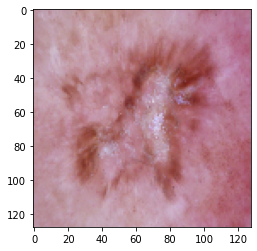

In [113]:
plt.imshow(x[12].astype(int))

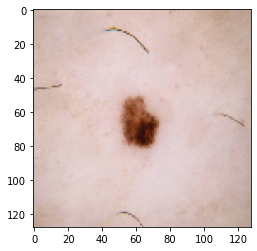

In [107]:
plt.imshow(x_val[12].astype(int))

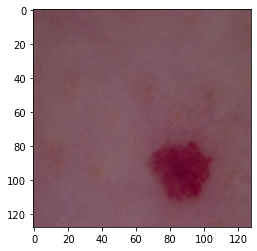

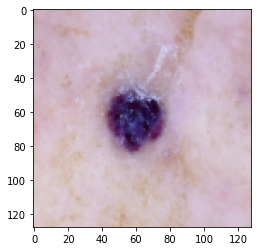

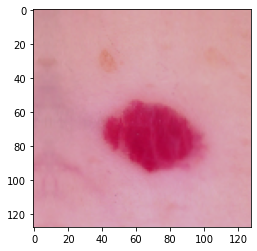

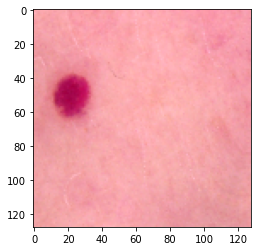

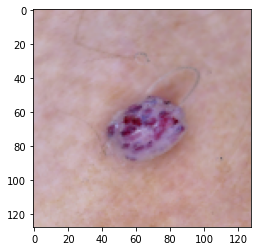

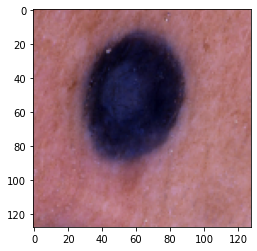

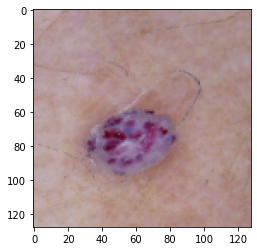

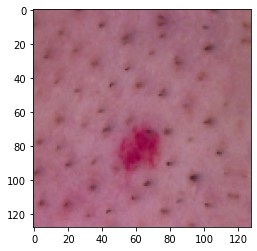

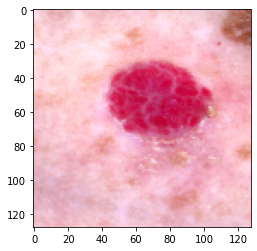

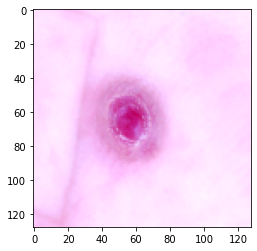

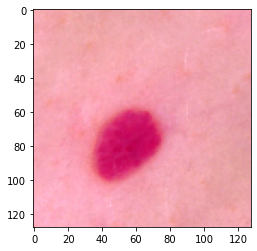

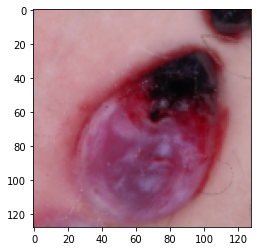

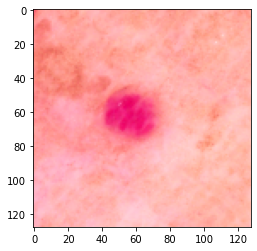

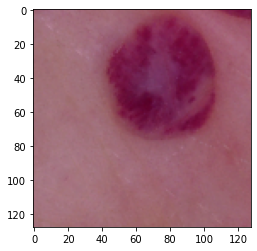

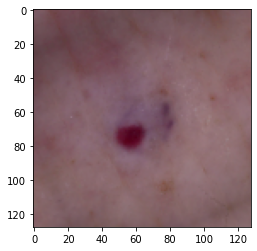

In [338]:
for i in range(0,15):
    image=x_vasc_5[i].astype(int)
    plt.imshow(image)
    plt.show()